*Nombre: Vicente Espinosa Gonzalez*

*1*

*La base de datos usada es __Contol3DB.db__, la cual esta en la misma carpeta que este notebook*

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import sqlite3
import numpy as np

*2.1.1*

In [113]:
con = sqlite3.connect("Control3DB.db")
cur = con.cursor()
cur.execute("select cantidad, metros_plaza from presupuesto JOIN areas_verdes USING(id_comuna)")
presupuesto_plaza = pd.DataFrame(cur.fetchall())
con.close()

print(presupuesto_plaza)
con.close()

            0       1
0    59072234   58460
1    13984404  130316
2     1584008    4050
3     3950000    2300
4     5887820   12925
..        ...     ...
307  10459701  168800
308   5001190   21282
309   3386698   21925
310   1798500    9500
311   3979700   36300

[312 rows x 2 columns]


In [91]:
array1 = np.array(presupuesto_plaza)

In [92]:
presu = array1[:,[True, False]]
plaza = array1[:,[False, True]]

In [93]:
train_set, test_set = train_test_split(array1, test_size=0.15)

In [62]:
array1 = np.array(presupuesto_plaza)
presu_train = train_set[:, [True, False]]
plaza_train = train_set[:, [False, True]]
lin_reg = LinearRegression()
lin_reg.fit(presu_train, plaza_train)

LinearRegression()

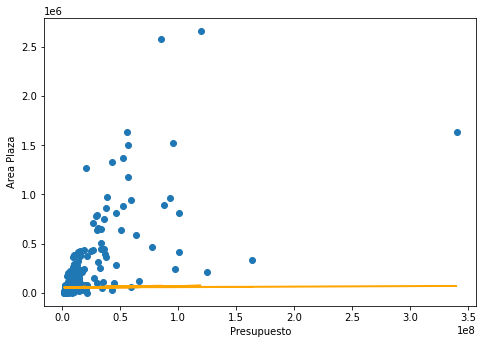

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(presu, plaza )

# Estamos graficando una recta que en el eje X tiene el arreglo setosa_sepal_width
# Y en el eje Y agregamos las predicciones para esos valores de X
plt.plot(presu, lin_reg.predict(plaza), color="orange")

ax.set_xlabel('Presupuesto')
ax.set_ylabel('Area Plaza')
plt.show()

In [84]:
presu_test = test_set[:, [True, False]]
plaza_test = test_set[:, [False, True]]

length_predictions = lin_reg.predict(presu_test)

In [109]:
df_presu_plaza = pd.DataFrame(presupuesto_plaza)
df_presu_plaza

,0,1
0,59072234,58460
1,13984404,130316
2,1584008,4050
3,3950000,2300
4,5887820,12925
...,...,...
307,10459701,168800
308,5001190,21282
309,3386698,21925
310,1798500,9500


In [110]:
corr_matrix = df_presu_plaza.corr()
corr_matrix[0].sort_values(ascending=False)

0    1.000000
1    0.665585
Name: 0, dtype: float64

*2.1.2*

In [112]:
con = sqlite3.connect("Control3DB.db")
cur = con.cursor()
cur.execute("select cantidad, (metros_plaza + matros_parque) from presupuesto JOIN areas_verdes USING(id_comuna)")
presupuesto_verde = pd.DataFrame(cur.fetchall())
con.close()

print(presupuesto_plaza)
con.close()

            0       1
0    59072234  153284
1    13984404  130316
2     1584008    4050
3     3950000    2300
4     5887820   33674
..        ...     ...
307  10459701  251026
308   5001190   21282
309   3386698   21925
310   1798500    9500
311   3979700   40480

[312 rows x 2 columns]


In [114]:
array2 = np.array(presupuesto_verde)

In [115]:
presu2 = array2[:,[True, False]]
verde = array2[:,[False, True]]

In [116]:
train_set2, test_set2 = train_test_split(array2, test_size=0.15)

In [117]:
presu_train2 = train_set2[:, [True, False]]
verde_train = train_set2[:, [False, True]]
lin_reg2 = LinearRegression()
lin_reg2.fit(presu_train2, verde_train)

LinearRegression()

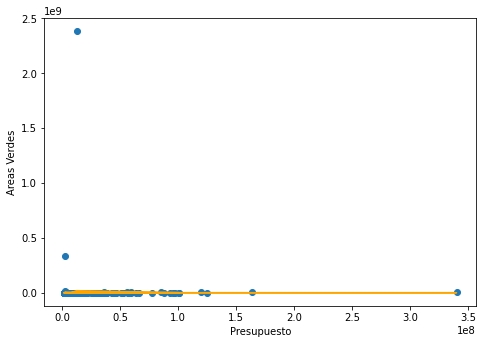

In [118]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(presu2, verde )

# Estamos graficando una recta que en el eje X tiene el arreglo setosa_sepal_width
# Y en el eje Y agregamos las predicciones para esos valores de X
plt.plot(presu2, lin_reg.predict(verde), color="orange")

ax.set_xlabel('Presupuesto')
ax.set_ylabel('Areas Verdes')
plt.show()

In [119]:
df_presu_verde = pd.DataFrame(presupuesto_verde)
df_presu_verde

,0,1
0,59072234,153284
1,13984404,130316
2,1584008,4050
3,3950000,2300
4,5887820,33674
...,...,...
307,10459701,251026
308,5001190,21282
309,3386698,21925
310,1798500,9500


In [120]:
corr_matrix = df_presu_verde.corr()
corr_matrix[0].sort_values(ascending=False)

0    1.000000
1   -0.006414
Name: 0, dtype: float64

*2.1.3*

*Dado que la correlacion de presupuesto- areas de plazas es aprox 0.665585, y la de presupuesto - areas verdes es aprox -0.006414 podemos decir que es mejor hace una regreción con el area de plazas, pues es mucho más confiable, y se ralacionan más.*

*2.2*

In [131]:
from sklearn.model_selection import cross_val_score

#Instanciamos un modelo
modelo_regresion = LinearRegression()

# Volvemos a considerar todas las Iris Setosa
presu = array1[:,[True, False]]
plaza = array1[:,[False, True]]

# No sirve como parámetro mean_squared_error
scores = cross_val_score(modelo_regresion, plaza, presu, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([15622471.32324226, 10983732.46648973, 11589205.54256619,
       40034943.79749148, 21762740.62282478])

In [132]:
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

19998618.75052289
10730363.636798292
